In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/Shareddrives/Inteligencia Artificial/Reto Bloque 2/Datasets/2012_2019_PlatteRiverWeir_features_merged_all.csv'
df = pd.read_csv(url)
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns.tolist()

['SensorTime',
 ' CaptureTime',
 ' Filename',
 ' Agency',
 ' SiteNumber',
 ' TimeZone',
 ' Stage',
 ' Discharge',
 ' CalcTimestamp',
 ' width',
 ' height',
 ' exposure',
 ' fNumber',
 ' isoSpeed',
 ' shutterSpeed',
 ' grayMean',
 ' graySigma',
 ' entropyMean',
 ' entropySigma',
 ' hMean',
 ' hSigma',
 ' sMean',
 ' sSigma',
 ' vMean',
 ' vSigma',
 ' areaFeatCount',
 ' grayMean 0',
 ' graySigma 0',
 ' entropyMean 0',
 ' entropySigma 0',
 ' hMean 0',
 ' hSigma 0',
 ' sMean 0',
 ' sSigma 0',
 ' vMean 0',
 ' vSigma 0',
 ' grayMean 1',
 ' graySigma 1',
 ' entropyMean 1',
 ' entropySigma 1',
 ' hMean 1',
 ' hSigma 1',
 ' sMean 1',
 ' sSigma 1',
 ' vMean 1',
 ' vSigma 1',
 ' WeirAngle',
 ' WeirPt1X',
 ' WeirPt1Y',
 ' WeirPt2X',
 ' WeirPt2Y',
 ' WwRawLineMin',
 ' WwRawLineMax',
 ' WwRawLineMean',
 ' WwRawLineSigma',
 ' WwCurveLineMin',
 ' WwCurveLineMax',
 ' WwCurveLineMean',
 ' WwCurveLineSigma']



* Un friego de columnas para elegir
* Ya tienen los valores transformados con las media, mean, max y min


In [ ]:
df.isnull().sum()

SensorTime           0
 CaptureTime         0
 Filename            0
 Agency              0
 SiteNumber          0
 TimeZone            0
 Stage               0
 Discharge           0
 CalcTimestamp       0
 width               0
 height              0
 exposure            0
 fNumber             0
 isoSpeed            0
 shutterSpeed        0
 grayMean            0
 graySigma           0
 entropyMean         0
 entropySigma        0
 hMean               0
 hSigma              0
 sMean               0
 sSigma              0
 vMean               0
 vSigma              0
 areaFeatCount       0
 grayMean 0          0
 graySigma 0         0
 entropyMean 0       0
 entropySigma 0      0
 hMean 0             0
 hSigma 0            0
 sMean 0             0
 sSigma 0            0
 vMean 0             0
 vSigma 0            0
 grayMean 1          0
 graySigma 1         0
 entropyMean 1       0
 entropySigma 1      0
 hMean 1             0
 hSigma 1            0
 sMean 1             0
 sSigma 1  

Correlación de Pearson

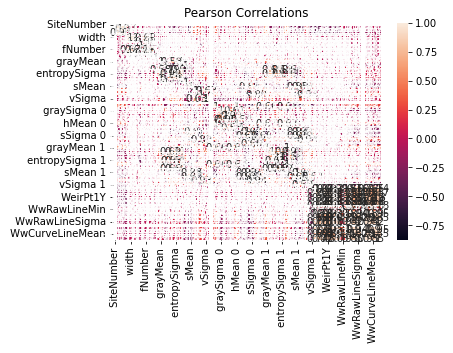

In [ ]:
ax = sns.heatmap(df.corr(), annot=True).set(title='Pearson Correlations');

## Limpia de Datos

Convertir columnas de fecha/tiempo a segundos/enteros

In [ ]:
x = pd.to_datetime(df['SensorTime'], format="%Y-%m-%d %H:%M:%S")

time = []
for day in x:
  time.append(day.timestamp())
df["SensorTimeINT"] = time

Crear segundo DataFrame con valores INT y dejando solo una variable dependiente la cual es Stage

In [ ]:
df_int = df.drop(columns = ['SensorTime', ' CaptureTime', ' Filename', ' Agency', ' TimeZone', ' CalcTimestamp', ' Discharge'])
df_int.shape

(42059, 53)

Identificar que columnas utilizar 

PCA

In [ ]:
x = df_int

pca = PCA(n_components = 10)
pca.fit(x)

print("Componentes:")
print(pca.components_)

print("Varianza explicada:")
print(pca.explained_variance_)

print("Porcentaje de varianza explicada:")
print(pca.explained_variance_ratio_) 

Componentes:
[[ 0.00000000e+00 -1.33468401e-09 -2.69085742e-09 -1.81067041e-09
   8.12882994e-11 -2.34319189e-11 -5.76312993e-09  3.02076968e-09
   7.74239103e-08  9.16079390e-09  5.56460656e-11  3.54444105e-10
   8.21628568e-08  5.50355594e-09  1.05408582e-09  1.58608728e-09
   1.55521145e-09  9.74121641e-09  0.00000000e+00  1.99175646e-08
   6.48967140e-09  1.74114035e-11  1.18093837e-10  2.17883989e-08
   6.93451673e-09  1.44430798e-09  3.94302241e-10 -2.18448961e-09
   1.37095092e-09  6.20624784e-08  4.27015528e-08  1.00294556e-10
   6.80240370e-10  6.22624098e-08  4.29890895e-08  1.33730739e-09
   1.10908951e-09  7.24814941e-09  9.71520498e-09 -5.73233518e-11
   4.18778088e-07 -5.39983845e-07 -3.29362019e-08 -5.57769150e-07
   5.38277386e-06 -1.62537834e-05 -1.56301746e-05 -1.15260441e-05
   0.00000000e+00 -1.81723132e-05 -1.54354130e-05 -1.16120678e-05
  -9.99999999e-01]
 [ 6.77626326e-21 -1.38256416e-06 -4.85787716e-06 -3.26885192e-06
  -1.37462942e-06 -5.08243766e-08 -1.0404332

Varianza explicada acumulada:
 [0.9999993  0.99999997 0.99999999 1.         1.         1.
 1.         1.         1.         1.        ]


Text(0.5, 1.0, 'Número de componentes vs porcentaje de varianza explicada')

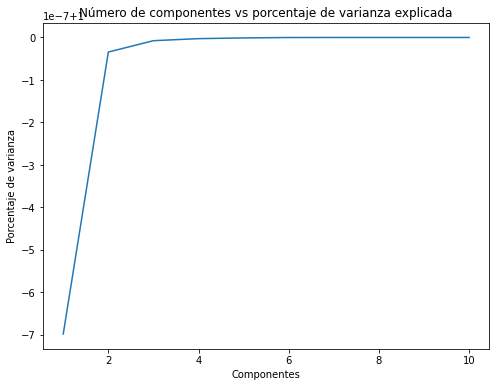

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

print("Varianza explicada acumulada:\n", cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11, 1), cumulative_variance)
plt.xlabel("Componentes")
plt.ylabel("Porcentaje de varianza")
plt.title("Número de componentes vs porcentaje de varianza explicada")

In [ ]:
pca = PCA(n_components = 10)
pca.fit(x)

scores = pca.transform(x)

print("Nuevas variables:\n", scores)

Nuevas variables:
 [[ 1.32863535e+08 -9.64840143e+04  5.84571375e+03 ... -1.54407560e+01
   1.70228458e+01 -6.95603289e+01]
 [ 1.32863535e+08 -9.64840092e+04  5.84572604e+03 ... -1.53889064e+01
   1.73895005e+01 -6.83312569e+01]
 [ 1.32861735e+08 -9.64840687e+04  5.84572358e+03 ... -1.53161761e+01
   1.74892180e+01 -6.74910602e+01]
 ...
 [-9.86803693e+07  2.54453347e+04  4.33704516e+03 ...  2.83092869e+02
  -1.28943413e+02  3.28434791e+02]
 [-9.86839695e+07  2.91255173e+04  7.34184786e+03 ...  2.28001067e+02
  -7.91820064e+01  3.23748746e+02]
 [-9.86866698e+07  3.80349044e+04  6.81690525e+03 ...  4.34163345e+00
  -1.40979205e+02  3.56456272e+02]]


## Graficar

Gráficas para Stage

Gráficas para Discharge

## Modelos

Modelo con dos dependientes

In [ ]:
# definir variables dependientes y e independientes X

# X = pd.DataFrame(df[['???']].values)
# y = pd.DataFrame(df[[' Stage', ' Discharge']].values)


In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

Modelos con dependiente Stage

Modelos con dependiente Discharge

In [ ]:
# Características utilizadas en la primera iteración
X  = df[[' grayMean', ' graySigma', ' entropyMean', ' entropySigma', ' hMean', ' hSigma', ' sMean', ' sSigma', ' vMean', ' vSigma']]
y1 = df[' Stage']
y2 = df[' Discharge']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y2, test_size=0.3)

from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)
reg.fit(x_train, y_train)

In [ ]:
reg.score(x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdm = RandomForestRegressor(max_depth=50, random_state=0)
rdm.fit(x_train, y_train)

In [ ]:
rdm.score(x_test, y_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train, y_train)

In [ ]:
regr.score(x_test, y_test)